In [1]:
#import cell
import numpy as np
import cv2
from skimage import color
import matplotlib.pyplot as plt

In [30]:
image = cv2.imread('4_1.bmp')
image[0::,0::,1] = ((image[0::,0::,1]/255)**0.5)* 255
cv2.imshow('new', image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [90]:
def linearStretch(pic, X, Y):
    image = cv2.imread(pic)
    image2hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist, bins = np.histogram(image2hsv[0::,0::,2].flatten(), 256, [0,256])
    
    cdf = hist.cumsum()
    cdf_norm = cdf * (hist.max()/cdf.max())
    
    plt.plot(cdf_norm)
    plt.hist(image2hsv[0::,0::,2].flatten(), 256, [0,256])
    plt.show()
    #((pixel - min)/(max - min)) * 255
    image2hsv[0::, 0::, 2] = ((image2hsv[0::,0::,2]-X)/(Y-X)) * 255
    image2 = cv2.cvtColor(image2hsv, cv2.COLOR_HSV2BGR)
    hist2, bins2 = np.histogram(image2hsv[0::,0::,2].flatten(), 256, [0,256])
    
    cdf2 = hist2.cumsum()
    cdf_norm2 = cdf2 * (hist.max()/cdf.max())
    
    plt.plot(cdf_norm2)
    plt.hist(image2hsv[0::,0::,2].flatten(), 256, [0,256])
    plt.show()
    
    cv2.imshow('original', image)
    cv2.imshow('edit', image2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()


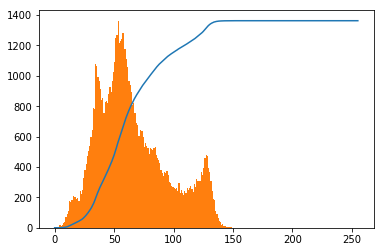

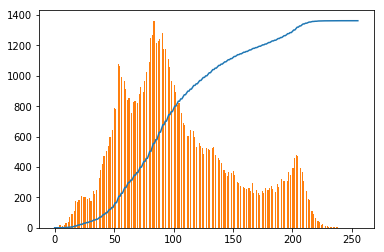

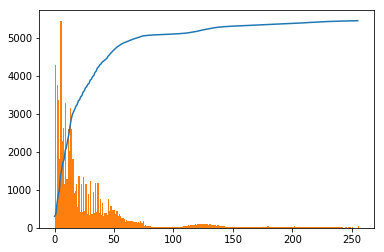

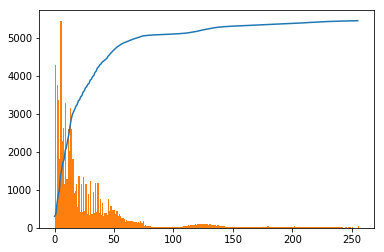

In [91]:
linearStretch('4_2.jpg', 1, 159)
linearStretch('4_3.jpg', 0, 255)

In [88]:
def histEq(pic):
    image = cv2.imread(pic)
    image2hsv = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist, bins = np.histogram(image2hsv[0::,0::,2].flatten(), 256, [0,256])
    
    cdf = hist.cumsum()
    cdf_norm = cdf * (hist.max()/cdf.max())
    
    plt.plot(cdf_norm)
    plt.hist(image2hsv[0::,0::,2].flatten(), 256, [0,256])
    plt.show()
    
    cdf2 = (cdf - cdf.min())*255/(cdf.max() - cdf.min())
            
    
    img2 = cdf2[image]
    for x in range(img2.shape[0]):
        for y in range(img2.shape[1]):
            img2[x, y, 2] = int(img2[x,y,2])
            
    # print(img2,image)
    hist2, bins2 = np.histogram(img2.flatten(), 256, [0,256])
    img2 = img2.astype('uint8')
    #newIm = np.dstack((image2hsv[:,:,0], image2hsv[:,:,1], img2))
    #newIm = cv2.cvtColor(newIm,cv2.COLOR_HSV2BGR)
    
    cdf2 = hist2.cumsum()
    cdf2_norm = cdf2 * (hist2.max()/cdf2.max())
    plt.plot(cdf2_norm)
    plt.hist(img2.flatten(), 256, [0,256])
    plt.show()
    print(img2.shape)

    
    cv2.imshow('original', image)
    cv2.imshow('edit', img2)
    
    cv2.waitKey(0)
    cv2.destroyAllWindows()

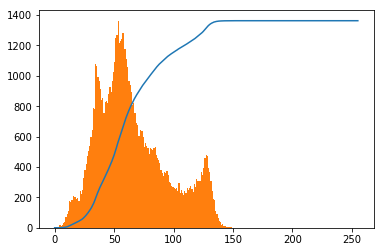

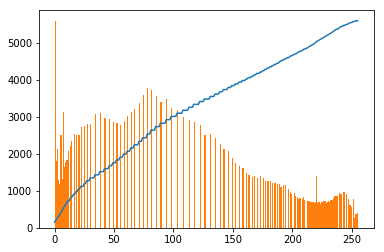

(228, 300, 3)


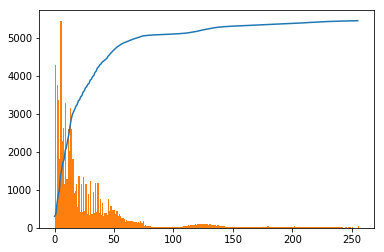

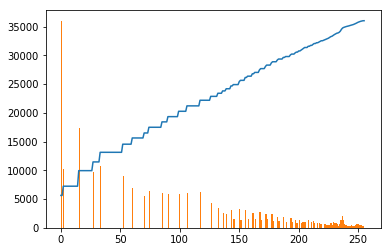

(240, 320, 3)


In [89]:
histEq('4_2.jpg')
histEq('4_3.jpg')

In [148]:
def close(value, array):
    count = -1
    for i in array:
        count = count + 1
        if i > value:
            return count
        return 255
            

In [157]:
def histSpec(pic):
    #create original historgram and cdf
    image = cv2.imread(pic)
    image2 = cv2.cvtColor(image,cv2.COLOR_BGR2HSV)
    hist, bins = np.histogram(image2[0::,0::,2].flatten(), 256, [0,256])
    
    cdf = hist.cumsum()
    cdf_norm = cdf * (hist.max()/cdf.max())
    
    plt.plot(cdf_norm)
    plt.hist(image2[0::,0::,2].flatten(), 256, [0,256])
    plt.show()
    
    #normal distribution
    normal = np.random.normal(128, 20, 500)
    normBins = np.zeros(256)
    
    for a in normal:
        a = int(a)
        if (a < 256) & (a >= 0) :
            normBins[a] += 1
            
    total = np.sum(normBins)
    normdBins = normBins / total
    #g = gauss
    g_cdf = np.cumsum(normdBins)

    cdf_ref = cdf / np.sum(cdf)

    
    for x in range(image2.shape[0]):
        for y in range(image2.shape[1]):
#             print(cdf_ref[image2[x,y,2]])
            closest = close(cdf_ref[image2[x,y,2]], g_cdf)
            image2[x,y,2] = closest

    hist2, bins2 = np.histogram(image2[0::,0::,2].flatten(), 256, [0,256])
    
    cdf2 = hist2.cumsum()
    cdf_norm2 = cdf2 * (hist2.max()/cdf2.max())
    
    plt.plot(cdf_norm2)
    plt.hist(image2[0::,0::,2].flatten(), 256, [0,256])
    plt.show()
    
    image2 = cv2.cvtColor(image2, cv2.COLOR_HSV2BGR)

    
    cv2.imshow('original', image)
    cv2.imshow('edit', image2)
    cv2.waitKey(0)
    cv2.destroyAllWindows()
    
            
    

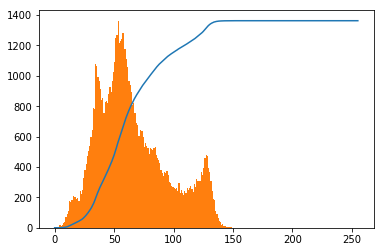

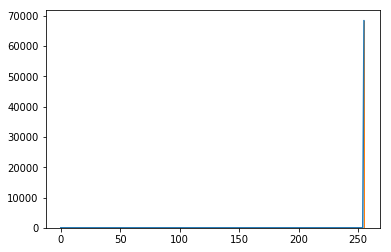

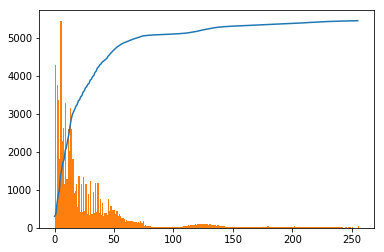

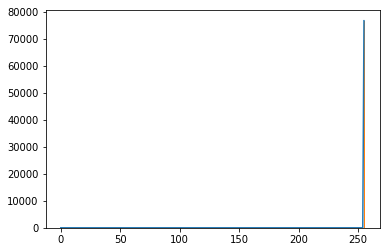

In [159]:
histSpec('4_2.jpg')
histSpec('4_3.jpg')